<a href="https://colab.research.google.com/github/soyab266/test/blob/master/FUNCTION_TRANSFORMER_%2CLOG_TRANSFORMER_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer , make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib.backends.backend_agg import FigureCanvasAgg as figurecanvas


In [ ]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [ ]:
  df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
plt.figure()

In [ ]:
df.skew()

Survived    0.478523
Age         0.389108
Fare        4.787317
dtype: float64

In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x= df.iloc[:,1:3]
y= df.iloc[:,0]

In [ ]:
x_train, x_test,y_train, y_test= train_test_split(x,y ,test_size=0.8, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


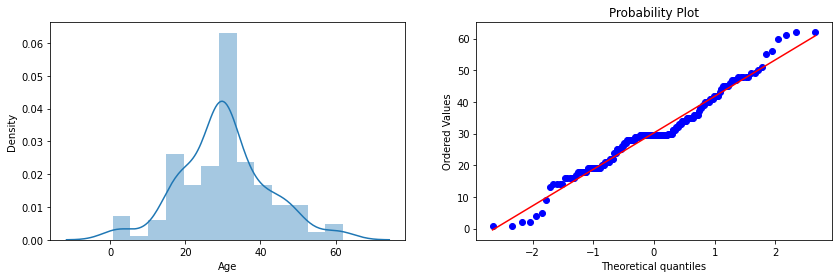

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train ['Age'])


plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.show()

this is distplot its showing right skew so  will have to use log transformer

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


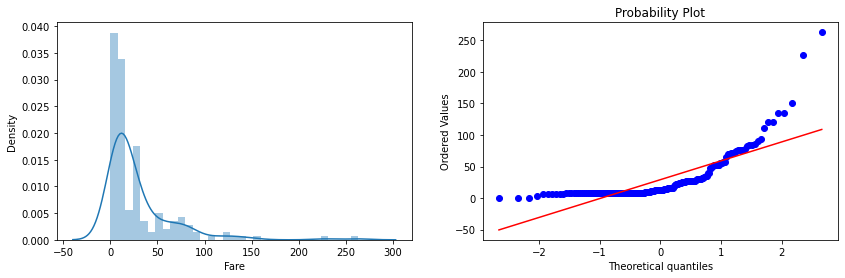

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])

plt.subplot(122)
stats.probplot(x_train ['Fare'],dist='norm', plot=plt)
plt.show()

In [ ]:
clf1=DecisionTreeClassifier()
clf2= LogisticRegression()

In [ ]:
clf1.fit(x_train, y_train)
clf2.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred1=clf1.predict(x_test)
ypred2=clf2.predict(x_test)

In [ ]:
print(accuracy_score(y_test, ypred1))

0.6100981767180925


In [ ]:
print(accuracy_score(y_test, ypred2))

0.6619915848527349


In [ ]:
trf=FunctionTransformer( func=np.log1p)

In [ ]:
xtraintransform= trf.fit_transform(x_train)
xtesttransform= trf.fit_transform(x_test)

In [ ]:
clf1.fit(xtraintransform, y_train)
clf2.fit(xtraintransform, y_train )


LogisticRegression()

In [ ]:
y_pred1=clf1.predict(xtraintransform)
y_pred2=clf2.predict(xtesttransform)

In [ ]:
#print(accuracy_score( y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))

0.6746143057503506


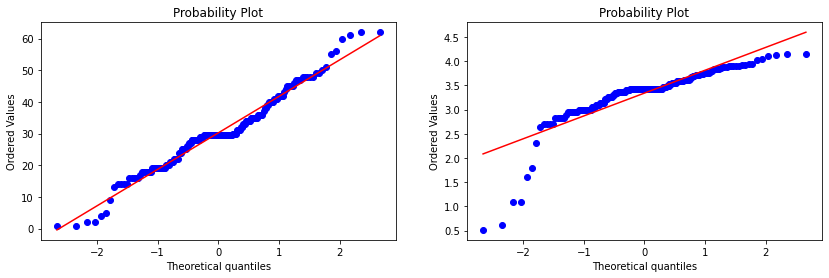

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)

plt.subplot(122)
stats.probplot(xtraintransform['Age'],dist='norm', plot=plt)
plt.show()